<a href="https://colab.research.google.com/github/Alexis-CAPON/cse437-reinforcement-learning/blob/main/lab4_dyna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: TD and Dyna




## Exercise 1: Implement SARSA with n-step TD (n=5) on CliffWalking

**Objective:**  
In this exercise, you will implement the **SARSA algorithm** using **n-step temporal-difference learning with n=5**. You will apply your implementation to the **CliffWalking environment** in Gymnasium, and analyze how multi-step returns influence learning compared to standard 1-step SARSA.

---

### Environment
- Use `CliffWalking-v1`

---

### Instructions
1. Implement **SARSA with n-step TD updates (n=5)**:
   - Maintain an action-value table \(Q(s,a)\).
   - Use ε-greedy exploration.
   - Store states, actions, and rewards for the last 5 steps.
   - After each step, compute the n-step return: G_t
   - Update \(Q(s_t,a_t)\) toward \(G_t\).

2. Train your agent for several thousand episodes (e.g., 5,000).

3. Plot the **episode rewards over time** to visualize learning progress.

4. Compare qualitatively with 1-step SARSA:
   - Does n-step SARSA converge faster or slower?
   - How do the policies differ near the cliff?

---

### Deliverables
- Python code implementing SARSA with TD(5) (notebook in Github).  
- A plot of episode number vs episode return (plot in a cell below).  
- A short discussion (1 paragraph) comparing the results with standard SARSA.  


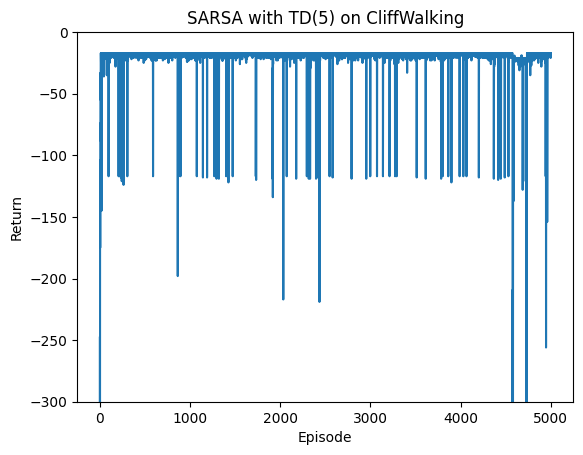

In [12]:
"""
Starter code for Exercise (you can use this code, or extend your code from previous lab)
Implement SARSA with TD(5) on CliffWalking-v1
"""

import numpy as np
import gymnasium as gym
from collections import deque
import matplotlib.pyplot as plt

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.05        # epsilon for epsilon-greedy policy
n_step = 5            # number of steps for TD(n)
n_episodes = 5000

# Initialize Q-table
Q = np.zeros((n_states, n_actions))

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q[state])

# Track returns
episode_returns = []

for ep in range(n_episodes):
    state, _ = env.reset()
    action = epsilon_greedy(state)

    # Buffers to store the trajectory
    states = deque()
    actions = deque()
    rewards = deque()

    T = float("inf")
    t = 0
    G = 0
    done = False

    while True:
        if t < T:
            # Take real step in the environment
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            states.append(state)
            actions.append(action)
            rewards.append(reward)

            if done:
                T = t + 1
            else:
                next_action = epsilon_greedy(next_state)
                state = next_state
                action = next_action

        # Time index for state/action to update
        tau = t - n_step

        if tau >= 0:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau, min(tau + n_step, T)):
                 G += (gamma ** (i - tau)) * rewards[i]

            # Check if the index for the next state/action is valid
            if tau + n_step < T:
                s_tau_n = states[tau + n_step]
                a_tau_n = actions[tau + n_step]
                G += (gamma ** n_step) * Q[s_tau_n, a_tau_n]
            elif tau + n_step == T: # Handle terminal state case
                 pass # G is already the full return if tau + n_step == T


            # Update Q[states[tau], actions[tau]] toward G
            Q[states[tau], actions[tau]] += alpha * (G - Q[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns.append(sum(rewards))

# Plot learning curve
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.ylim([-300, 0])
plt.title("SARSA with TD(5) on CliffWalking")
plt.show()

In [13]:
plot_Q(Q)

NameError: name 'plot_Q' is not defined

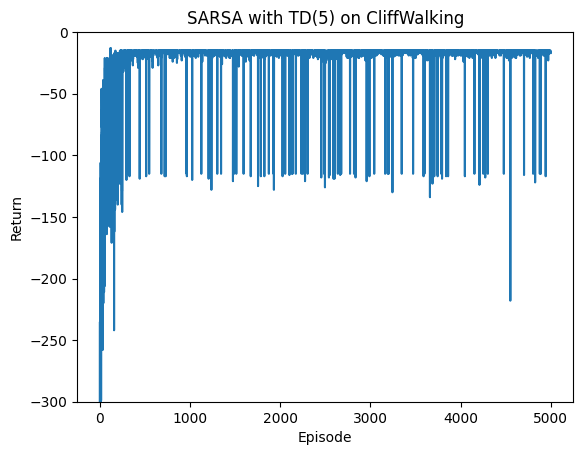

In [ ]:
"""
Starter code for Exercise (you can use this code, or extend your code from previous lab)
Implement SARSA with TD(5) on CliffWalking-v1
"""

import numpy as np
import gymnasium as gym
from collections import deque
import matplotlib.pyplot as plt

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.05        # epsilon for epsilon-greedy policy
n_step = 1            # number of steps for TD(n)
n_episodes = 5000

# Initialize Q-table
Q2 = np.zeros((n_states, n_actions))

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q2[state])

# Track returns
episode_returns = []

for ep in range(n_episodes):
    state, _ = env.reset()
    action = epsilon_greedy(state)

    # Buffers to store the trajectory
    states = deque()
    actions = deque()
    rewards = deque()

    T = float("inf")
    t = 0
    G = 0
    done = False

    while True:
        if t < T:
            # Take real step in the environment
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated

            states.append(state)
            actions.append(action)
            rewards.append(reward)

            if done:
                T = t + 1
            else:
                next_action = epsilon_greedy(next_state)
                state = next_state
                action = next_action

        # Time index for state/action to update
        tau = t - n_step

        if tau >= 0:
            G = 0.0
            # accumulate discounted rewards
            for i in range(tau, min(tau + n_step, T)):
                 G += (gamma ** (i - tau)) * rewards[i]

            # Check if the index for the next state/action is valid
            if tau + n_step < T:
                s_tau_n = states[tau + n_step]
                a_tau_n = actions[tau + n_step]
                G += (gamma ** n_step) * Q2[s_tau_n, a_tau_n]
            elif tau + n_step == T: # Handle terminal state case
                 pass # G is already the full return if tau + n_step == T


            # Update Q[states[tau], actions[tau]] toward G
            Q2[states[tau], actions[tau]] += alpha * (G - Q2[states[tau], actions[tau]])

        if tau == T - 1:
            break

        t += 1

    episode_returns.append(sum(rewards))

# Plot learning curve
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.ylim([-300, 0])
plt.title("SARSA with TD(5) on CliffWalking")
plt.show()

In [14]:

import seaborn as sns
import matplotlib.pyplot as plt
def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

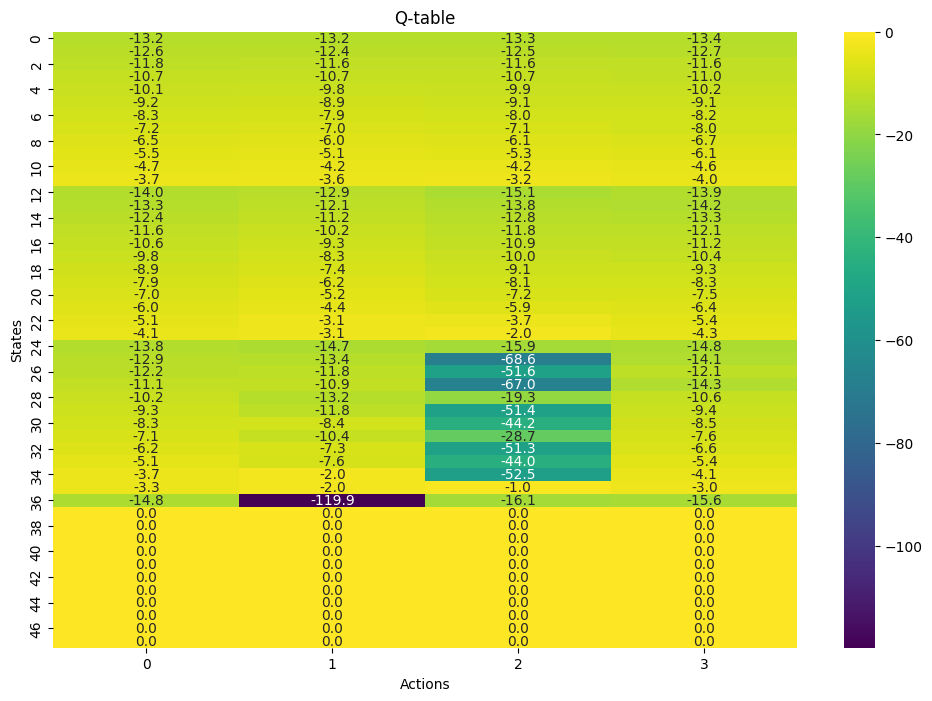

In [ ]:
plot_Q(Q2)

**Compare qualitatively with 1-step SARSA:**

**Does n-step SARSA converge faster or slower?**

The 5-step SARSA converge faster than the 1-step SARSA.

**How do the policies differ near the cliff?**

Near the cliff, the 1-step seems to be safer than the 5-step that will take shorter pass.


## Exercise 2: Dyna-Q for CliffWalking

**Objective**  
Implement **Dyna-Q** on **CliffWalking-v1** and compare its learning performance to **SARSA (1-step)** and **SARSA TD(5)**. You will analyze sample efficiency, stability near the cliff, and sensitivity to planning steps.

---

### Environment
- Use `CliffWalking-v1`
---

### Part A — Dyna-Q (Implementation)
1. **Q-table**: maintain `Q[s, a]` (tabular).
2. **Model**: learn an empirical model from experience.
   - For each observed transition `(s, a, r, s')`, update a dictionary:
     - Minimal: store the most recent `(s', r)` for `(s, a)`, **or**
     - Advanced: store a **multiset** of outcomes for `(s, a)` with counts (to sample stochastically).
3. **Real update (Q-learning)** after each env step:
   Q(s,a) ← Q(s,a) + α * (r + γ * max_a' Q(s',a') - Q(s,a))
4. **Planning updates**: after each real step, perform `N` simulated updates:
   - Sample a previously seen `(s_p, a_p)` from the model.
   - Sample `(r_p, s'_p)` from that entry.
   - Apply the same Q-learning backup using `(s_p, a_p, r_p, s'_p)`.
5. Use epsilon-greedy exploration.

---

### Part B — Baselines (Re-use / Implement)
- **SARSA (1-step)** with ε-greedy:
  \[
  Q(s,a) \leftarrow Q(s,a) + \alpha\big[r + \gamma Q(s',a') - Q(s,a)\big]
  \]
- **SARSA TD(5)** (n-step SARSA with \(n=5\)), as in Exercise 1.

Use the **same** γ, α, ε schedule, and number of episodes for a fair comparison.

---

### Part C — Experiments & Comparisons
1. **Learning curves**: plot **episode index vs. episode return** for:
   - Dyna-Q with \(N \in \{5, 20, 50\}\)
   - SARSA (1-step)
   - SARSA TD(5)
2. **Sample efficiency**: report the **episode number** at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).
3. **Stability near the cliff**: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?
4. **Sensitivity to planning steps**: compare Dyna-Q across N; discuss diminishing returns vs. computation.
5. **Statistical robustness**: run **≥5 seeds**; plot mean ± std (shaded) or report mean ± std of final returns.

---

### Deliverables
- **Code**: A driver script/notebook that reproduces your plots
- **Plots** (embedded in the notebook):
  - Learning curves (mean ± std across seeds)
  - Optional: heatmap of greedy policy/actions on the grid




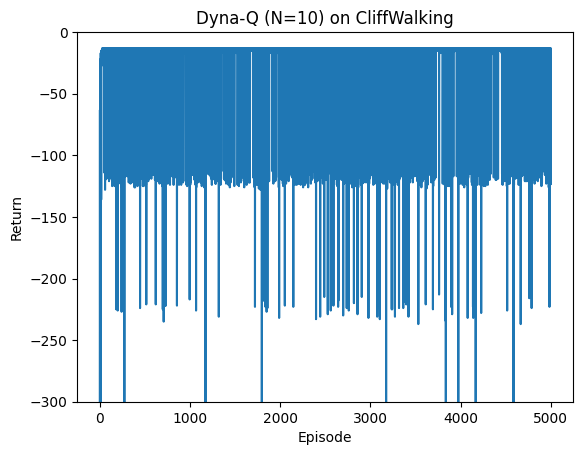

In [4]:
import numpy as np
import gymnasium as gym
from collections import deque
import matplotlib.pyplot as plt

# Environment
env = gym.make("CliffWalking-v1")

# Parameters
n_states = env.observation_space.n
n_actions = env.action_space.n
alpha = 0.1           # step size (learning rate)
gamma = 0.99          # discount factor
epsilon = 0.05        # epsilon for epsilon-greedy policy
n_episodes = 5000
N_planning_steps = 10 # Number of planning steps

# Initialize Q-table and Model
Q3 = np.zeros((n_states, n_actions))
Model = {} # Model to store observed transitions: (s, a) -> (r, s')

def epsilon_greedy(state):
    """Choose an action using epsilon-greedy policy."""
    if np.random.rand() < epsilon:
        return np.random.randint(n_actions)
    return np.argmax(Q3[state])


# Track returns
episode_returns = []

for ep in range(n_episodes):
    state, _ = env.reset()
    done = False
    episode_reward = 0

    while not done:
        # Real step
        action = epsilon_greedy(state)
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

        episode_reward += reward

        # Update Model
        Model[(state, action)] = (reward, next_state)

        # Q-learning update (real step)
        if done:
            target = reward
        else:
            target = reward + gamma * np.max(Q3[next_state])
        Q3[state, action] += alpha * (target - Q3[state, action])

        # Planning steps
        for _ in range(N_planning_steps):
            if len(Model) > 0:
                # Sample a previously seen state-action pair
                s_p, a_p = list(Model.keys())[np.random.randint(len(Model))]
                r_p, s_prime_p = Model[(s_p, a_p)]

                # Q-learning update (planning step)

                target_p = r_p + gamma * np.max(Q3[s_prime_p])
                Q3[s_p, a_p] += alpha * (target_p - Q3[s_p, a_p])


        state = next_state

    episode_returns.append(episode_reward)

# Plot learning curve
plt.plot(episode_returns)
plt.xlabel("Episode")
plt.ylabel("Return")
plt.ylim([-300, 0])
plt.title(f"Dyna-Q (N={N_planning_steps}) on CliffWalking")
plt.show()

Comparison of SALSA 5-step, 1-step and DynaQ: It seems that 5-step is doing a better job than the others. The DynaQ is struggling to converge well. And the 1-step is worse that 5-step but better than DynaQ

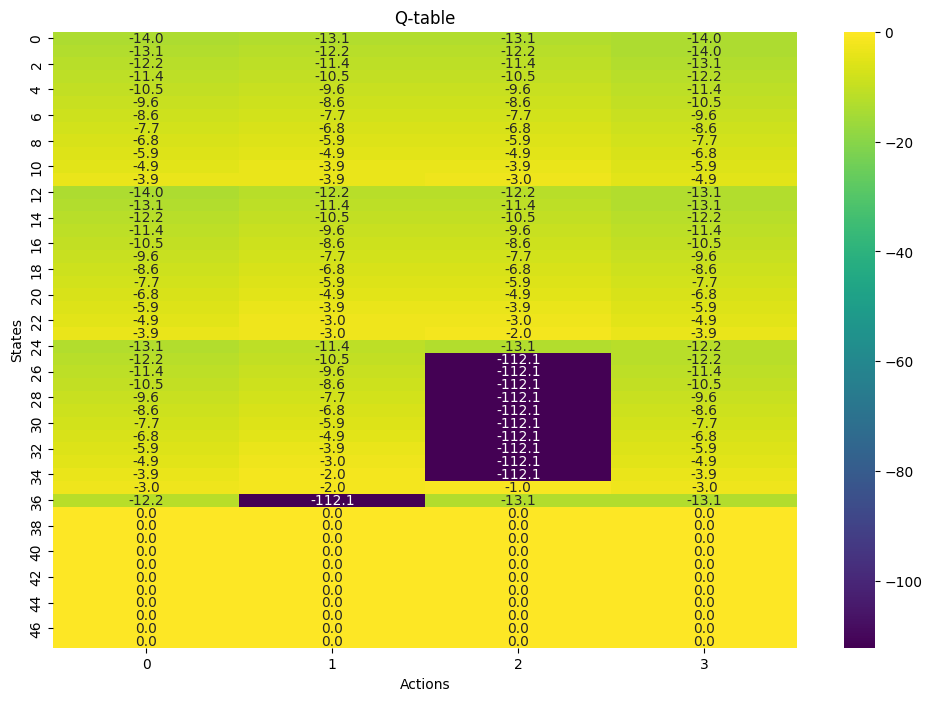

In [15]:
plot_Q(Q3)

In [10]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy:"+ str(title))
  plt.show()


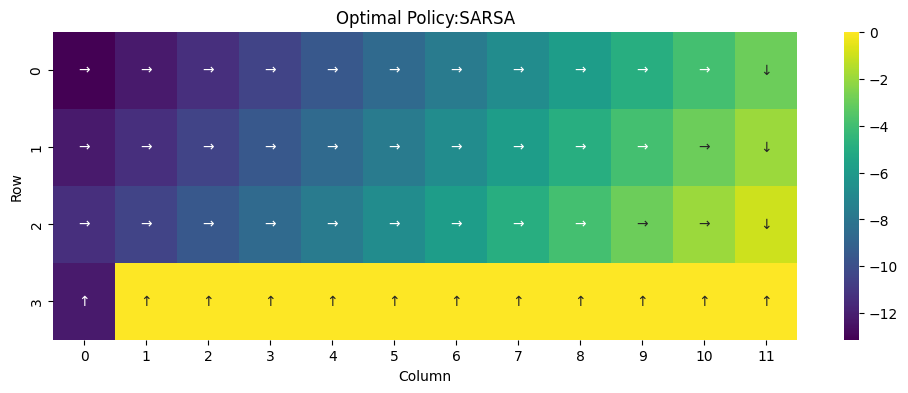

In [16]:
plot_policy(Q3)

Sample efficiency: report the episode number at which the average return over a sliding window (e.g., 100 episodes) first exceeds a chosen threshold (e.g., −30).

In [5]:
def sample_efficiency(episode_returns, window=100, threshold=-30.0):
    """
    Returns the 1-based episode index at which the moving average of returns
    over `window` episodes first exceeds `threshold`. Returns None if it never does.
    """
    r = np.asarray(episode_returns, dtype=float)
    if len(r) < window:
        return None  # not enough episodes to form a full window

    ma = np.convolve(r, np.ones(window)/window, mode="valid")  # length = len(r) - window + 1
    idx = np.argmax(ma > threshold)  # gives first True index, or 0 if none True
    if not np.any(ma > threshold):
        return None

    # Convert moving-average index to 1-based episode number in original sequence
    # Window ending episode = idx + window (0-based -> +1 for 1-based)
    return idx + window

Sample efficiency (first episode where 100-ep avg > -30): 116


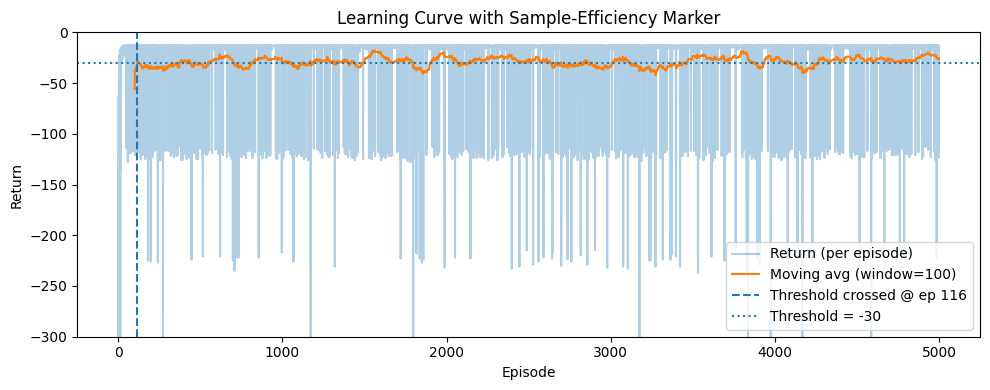

In [7]:
eff_ep = sample_efficiency(episode_returns, window=100, threshold=-30)

print("Sample efficiency (first episode where 100-ep avg > -30):", eff_ep)

# Optional: plot raw + moving average and mark the episode
plt.figure(figsize=(10,4))
plt.plot(episode_returns, alpha=0.35, label="Return (per episode)")
window = 100
ma = np.convolve(episode_returns, np.ones(window)/window, mode="valid")
plt.plot(range(window-1, window-1+len(ma)), ma, label=f"Moving avg (window={window})")

if eff_ep is not None:
    plt.axvline(eff_ep-1, linestyle="--", label=f"Threshold crossed @ ep {eff_ep}")
plt.axhline(-30, linestyle=":", label="Threshold = -30")

plt.xlabel("Episode")
plt.ylabel("Return")
plt.ylim([-300, 0])
plt.title("Learning Curve with Sample-Efficiency Marker")
plt.legend()
plt.tight_layout()
plt.show()

**Stability near the cliff: qualitatively inspect trajectories/policies; does the method hug the cliff or leave a safer margin?**
The method hug the cliff, it's doesn't take a safer margin


**Sensitivity to planning steps: compare Dyna-Q across N; discuss diminishing returns vs. computation.**

**Statistical robustness: run ≥5 seeds; plot mean ± std (shaded) or report mean ± std of final returns.**

In [24]:
def dyna_q_train(N):
  # Environment
  env = gym.make("CliffWalking-v1")

  # Parameters
  n_states = env.observation_space.n
  n_actions = env.action_space.n
  alpha = 0.1           # step size (learning rate)
  gamma = 0.99          # discount factor
  epsilon = 0.05        # epsilon for epsilon-greedy policy
  n_episodes = 5000
  N_planning_steps = N # Number of planning steps

  # Initialize Q-table and Model
  Q3 = np.zeros((n_states, n_actions))
  Model = {} # Model to store observed transitions: (s, a) -> (r, s')

  def epsilon_greedy(state):
      """Choose an action using epsilon-greedy policy."""
      if np.random.rand() < epsilon:
          return np.random.randint(n_actions)
      return np.argmax(Q3[state])


  # Track returns
  episode_returns = []

  for ep in range(n_episodes):
      state, _ = env.reset()
      done = False
      episode_reward = 0

      while not done:
          # Real step
          action = epsilon_greedy(state)
          next_state, reward, terminated, truncated, _ = env.step(action)
          done = terminated or truncated

          episode_reward += reward

          # Update Model
          Model[(state, action)] = (reward, next_state)

          # Q-learning update (real step)
          if done:
              target = reward
          else:
              target = reward + gamma * np.max(Q3[next_state])
          Q3[state, action] += alpha * (target - Q3[state, action])

          # Planning steps
          for _ in range(N_planning_steps):
              if len(Model) > 0:
                  # Sample a previously seen state-action pair
                  s_p, a_p = list(Model.keys())[np.random.randint(len(Model))]
                  r_p, s_prime_p = Model[(s_p, a_p)]

                  # Q-learning update (planning step)

                  target_p = r_p + gamma * np.max(Q3[s_prime_p])
                  Q3[s_p, a_p] += alpha * (target_p - Q3[s_p, a_p])


          state = next_state

      episode_returns.append(episode_reward)

  return episode_returns, Q3


def compare_Ns(
    Ns=(0, 5, 10, 20, 50)
):
    results = {}  # N -> array (len(seeds), n_episodes)
    for N in Ns:
        runs = []
        ret, _ = dyna_q_train(
              N=N
        )
        runs.append(ret)
        results[N] = np.vstack(runs)

    # Plot mean ± std
    plt.figure(figsize=(10, 5))
    xs = np.arange(n_episodes)
    for N in Ns:
        arr = results[N]
        mu, sigma = arr.mean(axis=0), arr.std(axis=0)
        plt.plot(xs, mu, label=f"N={N}")
        plt.fill_between(xs, mu - sigma, mu + sigma, alpha=0.2)
    plt.xlabel("Episode")
    plt.ylabel("Return (mean ± std over seeds)")
    plt.ylim([-300, 0])
    plt.title("Dyna-Q sensitivity to planning steps N")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Report final returns (last 100 episodes) mean ± std
    print("Final performance (last 100 episodes):")
    for N in Ns:
        arr = results[N][:, -100:].mean(axis=1)  # per-seed avg over last 100 eps
        print(f"  N={N:<3}  mean={arr.mean():.2f}  (n={len(arr)})")


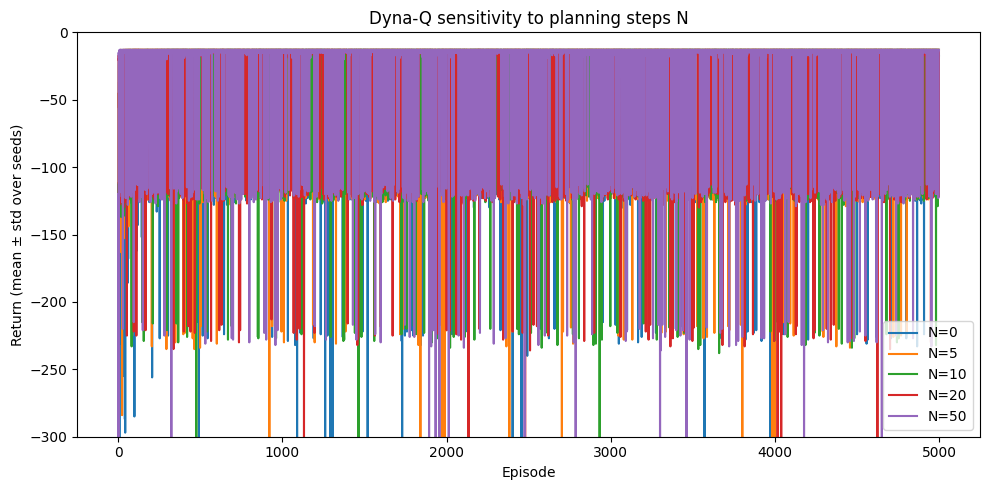

Final performance (last 100 episodes):
  N=0    mean=-26.34  (n=1)
  N=5    mean=-20.43  (n=1)
  N=10   mean=-27.41  (n=1)
  N=20   mean=-28.35  (n=1)
  N=50   mean=-27.50  (n=1)


In [25]:
compare_Ns(Ns=(0, 5, 10, 20, 50))

## Exercise 3: Solve FrozenLake with Q-Learning and Dyna-Q (Stochastic Model)

**Objective**  
Implement and compare **Q-learning** and **Dyna-Q** on Gymnasium’s `FrozenLake-v1`.  
For Dyna-Q, your learned **transition model must handle multiple possible next states** per `(s, a)` (stochastic slip), i.e., store and sample **a distribution** over `(s', r)` outcomes rather than a single next state.

---

### Environment
- Use `FrozenLake-v1` from `gymnasium.envs.toy_text`.
- You can start with map 4×4; and then work with 8×8.
- Start → Goal with slippery transitions (stochastic).  
- Rewards: `+1` at goal, `0` otherwise (holes terminate with 0).

---

### Part A — Q-learning (baseline)
1. Maintain a tabular action-value function `Q[s, a]`.
2. Behavior: ε-greedy over `Q`.
3. Update after each real step:
   - target = r + γ * max_a' Q[s', a']   (if terminal: target = r)
   - Q[s, a] ← Q[s, a] + α * (target − Q[s, a])
4. Train for several thousand episodes (e.g., 5,000) with an ε schedule (e.g., 0.2 → 0.01).

---

### Part B — Dyna-Q with a **stochastic transition model**
1. **Empirical model (multinomial):** for each `(s, a)`, maintain a multiset of observed outcomes:
   - `model[(s, a)] = [(s'_1, r_1, count_1), (s'_2, r_2, count_2), ...]`
   - Update counts whenever you observe `(s, a, r, s')`.
2. **Real step update (Q-learning):** same as Part A.
3. **Planning steps (N per real step):**
   - Sample a previously seen `(s_p, a_p)` uniformly (or with priority).
   - Sample `(s'_p, r_p)` **from the empirical distribution** for `(s_p, a_p)` using counts as probabilities.
   - Apply the same Q-learning backup with `(s_p, a_p, r_p, s'_p)`.
4. Train with the same ε schedule and number of episodes; vary `N ∈ {5, 20, 50}`.

---

### Experiments & Analysis
1. **Learning curves:** plot episode index vs episode return (smoothed) for:
   - Q-learning
   - Dyna-Q (N=5, 20, 50)
2. **Sample efficiency:** report the episode at which the moving-average return (e.g., window 100) first exceeds a threshold (you choose a reasonable value).
3. **Effect of stochastic modeling:** briefly explain why storing a distribution over `(s', r)` matters on FrozenLake (slip), and what happens if you store only the most recent outcome.
4. **Robustness:** run ≥5 random seeds; report mean ± std of final evaluation returns.

---

### Deliverables
- **Code** for Q-learning and Dyna-Q (with stochastic model).  
- **Plots** of learning curves (include legend and axis labels).  
- ** Discussion:** why Dyna-Q helps here; impact of N; importance of modeling multiple next states.

---

### Hints
- For terminal transitions (goal/hole), the Q-learning target is simply `target = r` (no bootstrap).  
- When sampling from the model, use probabilities `p_i = count_i / sum_j count_j`.  
- Tie-break greedy action selection uniformly among argmax actions to avoid bias.  
- Keep evaluation **greedy (ε=0)** and consistent across methods (same seeds and episode counts).


In [26]:
from collections import defaultdict

# Tie-break uniformly among argmax actions
def argmax_tiebreak(q_row, rng):
    maxv = np.max(q_row)
    return rng.choice(np.flatnonzero(q_row == maxv))

def epsilon_greedy(Q, s, eps, rng):
    if rng.random() < eps:
        return rng.integers(Q.shape[1])
    return argmax_tiebreak(Q[s], rng)

def smooth(x, w=100):
    x = np.asarray(x, float)
    if len(x) < w:
        return x
    k = np.ones(w)/w
    return np.convolve(x, k, mode="valid")

def sample_efficiency(returns, window=100, threshold=0.10):
    """First (1-based) episode where moving avg exceeds threshold; None if never."""
    r = np.asarray(returns, float)
    if len(r) < window: return None
    ma = np.convolve(r, np.ones(window)/window, mode="valid")
    ok = np.where(ma > threshold)[0]
    return int(ok[0] + window) if ok.size else None

In [28]:
def q_learning_train(
    env_id="FrozenLake-v1",
    n_episodes=5000,
    alpha=0.1,
    gamma=0.99,
    eps_start=0.2,
    eps_end=0.01,
    eps_decay=0.9995,
    seed=0,
    render_mode=None,
    is_slippery=True,
):
    env = gym.make(env_id, is_slippery=is_slippery, render_mode=render_mode)
    env.reset(seed=seed)
    env.action_space.seed(seed)

    nS = env.observation_space.n
    nA = env.action_space.n
    Q = np.zeros((nS, nA), dtype=np.float32)

    rng = np.random.default_rng(seed)
    eps = eps_start
    episode_returns = []

    for ep in range(n_episodes):
        s, _ = env.reset()
        done = False
        G = 0.0

        while not done:
            a = epsilon_greedy(Q, s, eps, rng)
            s2, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            # terminal handling
            target = r if done else r + gamma * np.max(Q[s2])
            Q[s, a] += alpha * (target - Q[s, a])
            s = s2
            G += r

        episode_returns.append(G)
        eps = max(eps_end, eps * eps_decay)

    env.close()
    return np.array(episode_returns, dtype=np.float32), Q


In [38]:
class StochasticModel:
    def __init__(self):
        # (s,a) -> { (s', r, done): count }
        from collections import defaultdict
        self.sa_outcomes = defaultdict(lambda: defaultdict(int))
        self.keys_cache = []

    def update(self, s, a, r, s2, done):
        is_new = (s, a) not in self.sa_outcomes
        self.sa_outcomes[(s, a)][(s2, r, done)] += 1
        if is_new:
            self.keys_cache.append((s, a))

    def sample_sa(self, rng):
        return self.keys_cache[rng.integers(len(self.keys_cache))]

    def sample_outcome(self, s, a, rng):
        outcomes = list(self.sa_outcomes[(s, a)].items())  # [((s2,r,done), count), ...]
        pairs, counts = zip(*outcomes)
        probs = np.array(counts, dtype=float); probs /= probs.sum()
        idx = rng.choice(len(pairs), p=probs)
        s2, r, done = pairs[idx]
        return s2, r, bool(done)

    def frozenlake_terminal_mask(env):
      nS = env.observation_space.n
      term = np.zeros(nS, dtype=bool)
      # env.P[s][a] = list of (prob, next_state, reward, done)
      for s in range(nS):
          for a in env.P[s]:
              for (_, s2, _, done) in env.P[s][a]:
                  if done:
                      term[s2] = True
      return term


def dyna_q_stochastic_train(
    env_id="FrozenLake-v1",
    n_episodes=5000,
    alpha=0.1,
    gamma=0.99,
    eps_start=0.2,
    eps_end=0.01,
    eps_decay=0.9995,
    N_plan=20,
    seed=0,
    render_mode=None,
    is_slippery=True,
):
    env = gym.make(env_id, is_slippery=is_slippery, render_mode=render_mode)
    env.reset(seed=seed); env.action_space.seed(seed)
    rng = np.random.default_rng(seed)

    nS = env.observation_space.n
    nA = env.action_space.n
    Q = np.zeros((nS, nA), dtype=np.float32)
    Model = StochasticModel()

    eps = eps_start
    episode_returns = []

    for ep in range(n_episodes):
        s, _ = env.reset()
        done = False
        G = 0.0
        while not done:
            a = epsilon_greedy(Q, s, eps, rng)
            s2, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated

            # Update model with terminal info
            Model.update(s, a, r, s2, done)

            # Real update
            target = r if done else r + gamma * np.max(Q[s2])
            Q[s, a] += alpha * (target - Q[s, a])

            # Planning (sample from empirical distribution, terminal-aware)
            if Model.keys_cache:
                for _ in range(N_plan):
                    sp, ap = Model.sample_sa(rng)
                    s2p, rp, donep = Model.sample_outcome(sp, ap, rng)
                    target_p = rp if donep else rp + gamma * np.max(Q[s2p])
                    Q[sp, ap] += alpha * (target_p - Q[sp, ap])

            s = s2
            G += r

        episode_returns.append(G)
        eps = max(eps_end, eps * eps_decay)

    env.close()
    return np.array(episode_returns, dtype=np.float32), Q



In [33]:
def evaluate_greedy(Q, env_id="FrozenLake-v1", episodes=100, seed=123, is_slippery=True):
    """Average greedy return over 'episodes' (ε=0)."""
    env = gym.make(env_id, is_slippery=is_slippery)
    rng = np.random.default_rng(seed)
    env.reset(seed=seed); env.action_space.seed(seed)

    total = 0.0
    for i in range(episodes):
        s, _ = env.reset()
        done = False
        G = 0.0
        while not done:
            a = argmax_tiebreak(Q[s], rng)
            s, r, terminated, truncated, _ = env.step(a)
            done = terminated or truncated
            G += r
        total += G
    env.close()
    return total / episodes

def run_many(method="q", Ns=(5,20,50), seeds=range(5), n_episodes=5000, env_id="FrozenLake-v1", is_slippery=True):
    """
    method: "q" (baseline) or "dyna"
    Returns dict: key -> results over seeds
      - for 'q'   : {"Q-learning": np.array([seeds, n_episodes])}
      - for 'dyna': {"N=5": ..., "N=20": ..., ...}
    Also returns final greedy eval stats per setting.
    """
    results = {}
    eval_stats = {}

    if method == "q":
        runs = []
        evals = []
        for sd in seeds:
            rets, Q = q_learning_train(env_id=env_id, n_episodes=n_episodes, seed=sd, is_slippery=is_slippery)
            runs.append(rets)
            evals.append(evaluate_greedy(Q, env_id=env_id, is_slippery=is_slippery))
        results["Q-learning"] = np.vstack(runs)
        eval_stats["Q-learning"] = (float(np.mean(evals)), float(np.std(evals)))
        return results, eval_stats

    elif method == "dyna":
        for N in Ns:
            runs = []
            evals = []
            for sd in seeds:
                rets, Q = dyna_q_stochastic_train(env_id=env_id, n_episodes=n_episodes, N_plan=N, seed=sd, is_slippery=is_slippery)
                runs.append(rets)
                evals.append(evaluate_greedy(Q, env_id=env_id, is_slippery=is_slippery))
            results[f"N={N}"] = np.vstack(runs)
            eval_stats[f"N={N}"] = (float(np.mean(evals)), float(np.std(evals)))
        return results, eval_stats


In [34]:
def plot_learning_curves(results_dict, window=200, title="FrozenLake Learning Curves"):
    plt.figure(figsize=(10,5))
    # results_dict: label -> array shape (n_seeds, n_episodes)
    for label, arr in results_dict.items():
        mu = arr.mean(axis=0)
        sd = arr.std(axis=0)
        if window > 1:
            mu_s = smooth(mu, window)
            # For shading, smooth upper/lower similarly for visual stability
            up_s = smooth(mu + sd, window)
            lo_s = smooth(mu - sd, window)
            xs = np.arange(len(mu_s))
            plt.plot(xs, mu_s, label=label)
            plt.fill_between(xs, lo_s, up_s, alpha=0.2)
        else:
            xs = np.arange(arr.shape[1])
            plt.plot(xs, mu, label=label)
            plt.fill_between(xs, mu - sd, mu + sd, alpha=0.2)
    plt.xlabel("Episode")
    plt.ylabel(f"Return (smoothed w={window})")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [35]:
def report_sample_efficiency_across(results_dict, window=200, threshold=0.10):
    """
    For each setting (key), compute per-seed first-episode threshold crossing, then report mean±std.
    """
    print(f"Sample efficiency: first episode where {window}-ep moving average > {threshold}")
    for label, arr in results_dict.items():
        hits = []
        for i in range(arr.shape[0]):  # seeds
            ep = sample_efficiency(arr[i], window=window, threshold=threshold)
            if ep is not None:
                hits.append(ep)
        if hits:
            print(f"  {label:<10}  ep = {np.mean(hits):.1f} ± {np.std(hits):.1f}  (n={len(hits)}/{arr.shape[0]})")
        else:
            print(f"  {label:<10}  never crossed (0/{arr.shape[0]})")


Greedy evaluation (mean ± std over seeds):
  Q-learning   0.678 ± 0.015

Greedy evaluation (mean ± std over seeds):
  N=5          0.560 ± 0.178
  N=20         0.680 ± 0.018
  N=50         0.664 ± 0.070


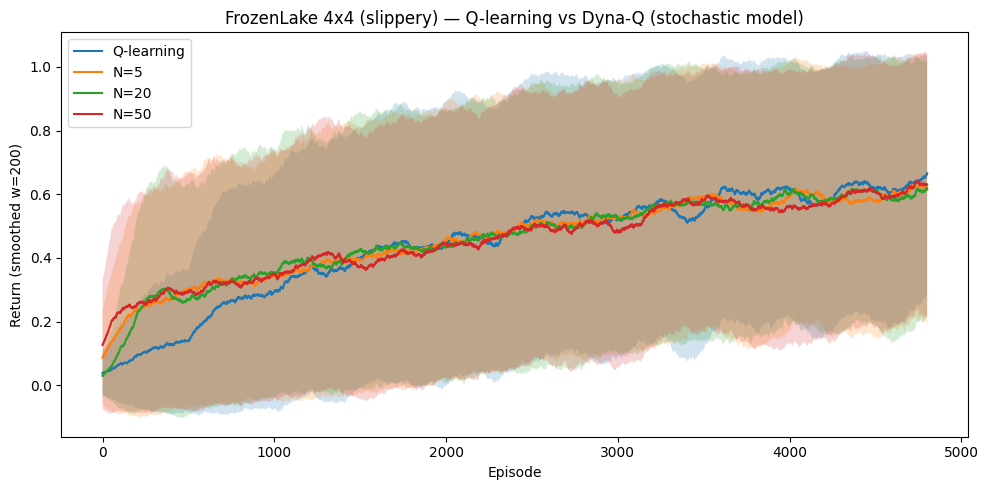

Sample efficiency: first episode where 200-ep moving average > 0.4
  Q-learning  ep = 1359.2 ± 311.9  (n=5/5)
  N=5         ep = 1413.6 ± 119.3  (n=5/5)
  N=20        ep = 1349.4 ± 139.1  (n=5/5)
  N=50        ep = 1402.6 ± 235.8  (n=5/5)


In [40]:
# 1) Q-learning baseline
q_res, q_eval = run_many(method="q", seeds=range(5), n_episodes=5000, env_id="FrozenLake-v1", is_slippery=True)
print("Greedy evaluation (mean ± std over seeds):")
for k,(m,s) in q_eval.items():
    print(f"  {k:<12} {m:.3f} ± {s:.3f}")

# 2) Dyna-Q with stochastic model
d_res, d_eval = run_many(method="dyna", Ns=(5,20,50), seeds=range(5), n_episodes=5000, env_id="FrozenLake-v1", is_slippery=True)
print("\nGreedy evaluation (mean ± std over seeds):")
for k,(m,s) in d_eval.items():
    print(f"  {k:<12} {m:.3f} ± {s:.3f}")

# 3) Learning curves (smoothed)
both = {"Q-learning": q_res["Q-learning"], **d_res}
plot_learning_curves(both, window=200, title="FrozenLake 4x4 (slippery) — Q-learning vs Dyna-Q (stochastic model)")

# 4) Sample efficiency (choose a threshold suitable for FrozenLake).
report_sample_efficiency_across(both, window=200, threshold=0.4)
